# Natural Language processing - Sentiment analysis using vadersentiment  tool 

## In this we will find out the true sentiment of the reviews posted by the customers on amazon. There shall be three classification of sentiments namely "Positive","Negative" and "Neutral". 

## Using Vader Sentiment tool we shall depict class of each review. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# Metrics 
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB    # Naive bayes algorithm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Importing Final review file which is preprocessed and merged.

In [2]:
review = pd.read_csv("final_reviews_file.csv")
review

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,<bound method NDFrame.rank of overall...,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,<bound method NDFrame.rank of overall...,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,<bound method NDFrame.rank of overall...,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,<bound method NDFrame.rank of overall...,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,<bound method NDFrame.rank of overall...,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,<bound method NDFrame.rank of overall...,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['CDs & Vinyl'],['Country'],['Country']
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,<bound method NDFrame.rank of overall...,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['CDs & Vinyl'],['Pop'],['Pop']
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,<bound method NDFrame.rank of overall...,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['CDs & Vinyl'],['Pop'],['Pop']
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,<bound method NDFrame.rank of overall...,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['CDs & Vinyl'],['Pop'],['Pop']


# Since the size of the data is huge it is recommended to sample the data for easy and quick conclusion

## sampling the data with respect to the overall column, so that equal sample be extracted pertaining to different classes of overall column ie. 1, 2, 3, 4, 5 in order to get a clear analysis on the review text. 

In [3]:
## sampling 
groupby_object = review.groupby('overall') 
dep=review['overall'].unique() 
strat_sample_df=pd.DataFrame() 
for d in dep:
    d_data=groupby_object.get_group(d) 
    sample_data=d_data.sample(n = 50000,random_state=1)  
    strat_sample_df=strat_sample_df.append(sample_data,ignore_index=True) 
    
    
strat_sample_df

C:\Users\ankit gurung\AppData\Local\Temp\ipykernel_2488\2903411394.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  strat_sample_df=strat_sample_df.append(sample_data,ignore_index=True)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,False,2000-05-17,AED6KI8T2OEZU,B00000AGMV,rickshayne,"ok, i don't have this album but i'm sure after...",d_h_monroe@hotmail.com . Someone PLEASE REPLY,good,In the Beginning,['B000002LAX'],madonna,<bound method NDFrame.rank of overall...,[],Digital Music,4.420000,['CDs & Vinyl'],['Dance & Electronic'],['Disco']
1,4.0,False,2005-12-05,AK5DRX4JZ5OD0,B0002XEDNU,Reg,"i've given this live album 4 stars only, simpl...","A bit of a taste, a bit of a tease",good,Fiebre,"['B000005J53', 'B000006E4K', 'B00005B51H']",radio tarifa,<bound method NDFrame.rank of overall...,['B000025AK1'],Digital Music,16.101245,['CDs & Vinyl'],['World Music'],['Europe']
2,4.0,False,2007-06-14,A2O4R917QCTNBM,B0000029AP,sjc,as other reviewers have said this is a classic...,Great SACD Version of Toys,good,Toys In The Attic Remastered,"['B0000029AS', 'B0000029AN', 'B007V4QLOC', 'B0...",aerosmith,<bound method NDFrame.rank of overall...,"['B00CJ7XYIC', 'B0000029AN', 'B016W63RR8', 'B0...",Digital Music,1.990000,['CDs & Vinyl'],['Classic Rock'],['Album-Oriented Rock (AOR)']
3,4.0,False,2003-03-01,A2FGK9K4K10K86,B000001DSD,J. Miller,in sides is a good orbital album -- but there'...,Find the Other 2nd Disc,good,In-Sides,"['B000003R5R', 'B00000J8LA', 'B07CXFK8JH', 'B0...",orbital,<bound method NDFrame.rank of overall...,"['B07CXFK8JH', 'B00004T6UZ', 'B00VN7OFGO', 'B0...",Digital Music,10.850000,['CDs & Vinyl'],['Dance & Electronic'],['Ambient']
4,4.0,True,2016-09-18,AM7K76WF9BR7W,B000GWE8TQ,Jesse,"note that this is ink, not watercolor. they ar...",four stars,good,"Derwent Colored Pencils, Inktense Ink Pencils,...","['B004QQ5I06', 'B000TKCWCU', 'B004QQ5I0Q', 'B0...",derwent,<bound method NDFrame.rank of overall...,[],Office Products,13.990000,['Office and School Supplies'],['Paper'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.0,True,2018-02-06,A1RKZK2BHN49IW,B00006RSP9,Amazon Customer,got a black color in the carmine red pencil.,wrong color in the pencil,poor,"Prismacolor Col-Erase Erasable Colored Pencil,...","['B000J07P9U', 'B000HHG5CI', 'B000JI6HOG', 'B0...",prismacolor,<bound method NDFrame.rank of overall...,[],Office Products,5.520000,['Office and School Supplies'],['Writing and Correction Supplies'],['Pencils']
249996,1.0,True,2015-12-19,AWZR0O65DL2Q,B0067VH3OC,Nameless Faceless One,i have been wrestling with these inks all day....,faint colors and not working,poor,"Anti-UV Sublimation 100Ml Ink for Epson C68, C...","['B00ZJCDNMG', 'B00CEJQWFM', 'B000FSOZE4', 'B0...",ink jet,<bound method NDFrame.rank of overall...,"['B06XSB4M8J', 'B000FSOZE4', 'B073V5LPL8', 'B0...",Office Products,21.990000,['Office and School Supplies'],['Printer Ink and Toner'],NaN
249997,1.0,False,2006-04-07,A1JIW8GOSSGUQR,B00000JYY7,T. Gore,"how could any band named ""megadeth"" release a ...",Stinks like a dirty diaper,poor,Risk,"['B0002EXH4A', 'B0002EXH4U', 'B0002EXH4K', 'B0...",megadeth,<bound method NDFrame.rank of overall...,"['B0002EXH5E', 'B00008EUMA', 'B0002EXH40', 'B0...",Digital Music,2.000000,['CDs & Vinyl'],['Rock'],['Progressive']
249998,1.0,True,2016-07-16,A2ZRA0VW1EBSUR,B000002H33,Rachael Anderson,this was showed as it was available but it was...,Make sure in stock.,poor,Master of Puppets,"['B01BUX7Z6M', 'B01BUX7Z5I', 'B00EBDXU4A', 'B0...",metallica,<bound method NDFrame.rank of overall...,"['B00LYHXIE8', 'B07GW5LBS7', 'B01BUX7YY0', 'B0...",Digital Music,9.990000,['CDs & Vinyl'],['Metal'],['Pop Metal']


In [4]:
review_data = strat_sample_df

In [5]:
a = review_data['reviewText']

## Data cleaning (removing all special characters, numbers etc)

In [6]:
import re
def clean_text(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()

    return text

In [7]:
a = a.apply(clean_text)

## Removing all the stop words as per nltk library

In [8]:
stopwords = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
a = a.apply(lambda x :' '.join([word for word in x.split() if word not in (stopwords)]))
a

0         ok album m sure ll ll agree liking want know d...
1         ve given live album stars simply know experien...
2         reviewers said classic aerosmith album sounded...
3         sides good orbital album different release not...
4                    note ink watercolor semi-permanent dry
                                ...                        
249995                   got black color carmine red pencil
249996    wrestling inks day printing transfer paper ima...
249997    could band named megadeth release piece like a...
249998    showed available really wanted oh well better ...
249999    sharp uses tried-and-tested scheme virtually i...
Name: reviewText, Length: 250000, dtype: object

# Installing and importing VaderSentiment for sentimental analysis 

In [9]:
#pip install vaderSentiment

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
def sentiment_scores(sentence):
         
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    sentiment = ""
    
    if sentiment_dict['compound'] >= 0.05 :
        sentiment = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment = "Negative"
 
    else :
        sentiment = "Neutral"
        
    return sentiment

In [12]:
sentiment_scores(review.reviewText[0])

'Positive'

## Generating the sentiment class for all the review text (testing)

In [13]:
p = a[:100].apply(lambda i : sentiment_scores(i))
p

0     Positive
1     Positive
2     Positive
3     Positive
4      Neutral
        ...   
95    Negative
96    Positive
97    Positive
98    Positive
99    Positive
Name: reviewText, Length: 100, dtype: object

In [14]:
p.value_counts()

Positive    85
Neutral     12
Negative     3
Name: reviewText, dtype: int64

In [15]:
r = review_data.overall[0:100]
r.value_counts()

4.0    100
Name: overall, dtype: int64

In [16]:
review_data['review_sentiment'] = [np.nan]*len(review_data)
review_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type,review_sentiment
0,4.0,False,2000-05-17,AED6KI8T2OEZU,B00000AGMV,rickshayne,"ok, i don't have this album but i'm sure after...",d_h_monroe@hotmail.com . Someone PLEASE REPLY,good,In the Beginning,['B000002LAX'],madonna,<bound method NDFrame.rank of overall...,[],Digital Music,4.420000,['CDs & Vinyl'],['Dance & Electronic'],['Disco'],NaN
1,4.0,False,2005-12-05,AK5DRX4JZ5OD0,B0002XEDNU,Reg,"i've given this live album 4 stars only, simpl...","A bit of a taste, a bit of a tease",good,Fiebre,"['B000005J53', 'B000006E4K', 'B00005B51H']",radio tarifa,<bound method NDFrame.rank of overall...,['B000025AK1'],Digital Music,16.101245,['CDs & Vinyl'],['World Music'],['Europe'],NaN
2,4.0,False,2007-06-14,A2O4R917QCTNBM,B0000029AP,sjc,as other reviewers have said this is a classic...,Great SACD Version of Toys,good,Toys In The Attic Remastered,"['B0000029AS', 'B0000029AN', 'B007V4QLOC', 'B0...",aerosmith,<bound method NDFrame.rank of overall...,"['B00CJ7XYIC', 'B0000029AN', 'B016W63RR8', 'B0...",Digital Music,1.990000,['CDs & Vinyl'],['Classic Rock'],['Album-Oriented Rock (AOR)'],NaN
3,4.0,False,2003-03-01,A2FGK9K4K10K86,B000001DSD,J. Miller,in sides is a good orbital album -- but there'...,Find the Other 2nd Disc,good,In-Sides,"['B000003R5R', 'B00000J8LA', 'B07CXFK8JH', 'B0...",orbital,<bound method NDFrame.rank of overall...,"['B07CXFK8JH', 'B00004T6UZ', 'B00VN7OFGO', 'B0...",Digital Music,10.850000,['CDs & Vinyl'],['Dance & Electronic'],['Ambient'],NaN
4,4.0,True,2016-09-18,AM7K76WF9BR7W,B000GWE8TQ,Jesse,"note that this is ink, not watercolor. they ar...",four stars,good,"Derwent Colored Pencils, Inktense Ink Pencils,...","['B004QQ5I06', 'B000TKCWCU', 'B004QQ5I0Q', 'B0...",derwent,<bound method NDFrame.rank of overall...,[],Office Products,13.990000,['Office and School Supplies'],['Paper'],NaN,NaN


# Generating sentiment category for the sample data for future analysis 

In [17]:
lst = []
for i in a:
    lst.append(sentiment_scores(i))

review_data['review_sentiment'] = lst
review_data.review_sentiment.value_counts()

Positive    196662
Negative     35763
Neutral      17575
Name: review_sentiment, dtype: int64

In [18]:
review_data.overall.value_counts()

4.0    50000
5.0    50000
3.0    50000
2.0    50000
1.0    50000
Name: overall, dtype: int64

In [19]:
review_data.main_cat.value_counts()

Digital Music                   154568
Office Products                  66487
All Electronics                  12991
Amazon Home                       3658
Movies & TV                       3450
Arts Crafts & Sewing              2024
Tools & Home Improvement          1333
Industrial & Scientific           1299
Computers                         1271
Health & Personal Care             540
Toys & Games                       486
Books                              359
Sports & Outdoors                  291
Tools and Home Improvement         169
Cell Phones & Accessories          161
Camera & Photo                     122
Home Audio & Theater               119
Automotive                         105
Amazon Fashion                     104
Arts Crafts and Sewing              90
Software                            79
All Beauty                          74
Industrial and Scientific           48
Toys and Games                      32
Baby                                31
Health and Personal Care 

In [21]:
data = review_data[['reviewText','review_sentiment']]
data.head()

,reviewText,review_sentiment
0,"ok, i don't have this album but i'm sure after...",Positive
1,"i've given this live album 4 stars only, simpl...",Positive
2,as other reviewers have said this is a classic...,Positive
3,in sides is a good orbital album -- but there'...,Positive
4,"note that this is ink, not watercolor. they ar...",Neutral


## Train test split of data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data['reviewText'],data['review_sentiment'], test_size=0.20, random_state=12)


print('Train index',x_train.index)
print('Test index',x_test.index)

Train index Int64Index([ 69769,  69873,   3869,  88259, 140907,  93326,   7577, 143471,
             10506, 237955,
            ...
            196886,  61872, 208716, 128963, 206083,  36482,  40177, 150781,
            235163, 210763],
           dtype='int64', length=200000)
Test index Int64Index([109672, 143738, 180135, 248710,  41081, 115582, 247319,   4024,
             99395, 224873,
            ...
            247095,  59518, 162080, 213580,  91604,  23704, 228320, 101091,
            174512, 244930],
           dtype='int64', length=50000)


## TFIDF vectorizer model with Logistic Regression

In [23]:
tfidf_vectorizer = TfidfVectorizer()
x_train_vector = tfidf_vectorizer.fit_transform(x_train)
x_test_vector = tfidf_vectorizer.transform(x_test)

In [24]:
lr = LogisticRegression(max_iter = 200, verbose = 1)
ovr = OneVsRestClassifier(lr)

In [25]:
# fit the model on the training data
lr.fit(x_train_vector, y_train)
y_pred = lr.predict(x_test_vector)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


In [26]:
compare = pd.DataFrame()
compare['actual'] = y_test
compare['predicted'] = y_pred
compare

,actual,predicted
109672,Positive,Positive
143738,Positive,Positive
180135,Negative,Positive
248710,Positive,Positive
41081,Positive,Positive
...,...,...
23704,Positive,Positive
228320,Positive,Positive
101091,Positive,Positive
174512,Positive,Positive


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.73      0.80      7207
     Neutral       0.88      0.75      0.81      3509
    Positive       0.94      0.98      0.96     39284

    accuracy                           0.93     50000
   macro avg       0.90      0.82      0.86     50000
weighted avg       0.93      0.93      0.93     50000



In [28]:
accuracy1 = accuracy_score(y_test,y_pred)
recall1   = recall_score(y_test,y_pred, average = 'weighted')
f1score1  = f1_score(y_test,y_pred, average = 'weighted')
precision1= precision_score(y_test,y_pred, average = 'weighted')


print('Accuracy  :', round(accuracy1,2))
print('Recall    :', round(recall1,2))
print('F1-score  :', round(f1score1,2))
print('Precision :', round(precision1,2))

Accuracy  : 0.93
Recall    : 0.93
F1-score  : 0.93
Precision : 0.93


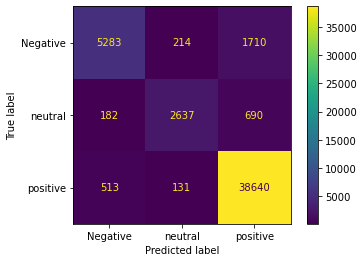

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ['Negative', 'neutral','positive'])

cm_display.plot()
plt.show()

## There are a total of 46,542 correctly predicted categlories (38,640+2635+5267)
## There are a total of 3458 correctly predicted categories (183+511+218+133+1722+691)
## The F1 score of predicting Positive sentiment is the highest with 98% F1 Score
## The overall F1 score and Accuracy is also high making it a good model for sentiment analysis 

# -------------------------------------------------------------------------------------------------------

## Other observations: 
## The overall score for all the reviews is not in accordance with the text. 
## Hence overall scorer can not be used for classifying the sentiment of the review 

# TFIDF vectorizer model with OVR classifer

In [31]:
# fit the model on the training data
ovr.fit(x_train_vector, y_train)
y_pred2= ovr.predict(x_test_vector)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s finished


In [32]:
compare2 = pd.DataFrame()
compare2['actual'] = y_test
compare2['predicted'] = y_pred2
compare2

,actual,predicted
109672,Positive,Positive
143738,Positive,Positive
180135,Negative,Positive
248710,Positive,Positive
41081,Positive,Positive
...,...,...
23704,Positive,Positive
228320,Positive,Positive
101091,Positive,Positive
174512,Positive,Positive


In [33]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    Negative       0.89      0.68      0.77      7207
     Neutral       0.90      0.70      0.79      3509
    Positive       0.93      0.99      0.96     39284

    accuracy                           0.92     50000
   macro avg       0.91      0.79      0.84     50000
weighted avg       0.92      0.92      0.92     50000



In [34]:
accuracy2 = accuracy_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2, average = 'weighted')
f1score2  = f1_score(y_test,y_pred2, average = 'weighted')
precision2= precision_score(y_test,y_pred2, average = 'weighted')


print('Accuracy  :', round(accuracy2,2))
print('Recall    :', round(recall2,2))
print('F1-score  :', round(f1score2,2))
print('Precision :', round(precision2,2))

Accuracy  : 0.92
Recall    : 0.92
F1-score  : 0.92
Precision : 0.92


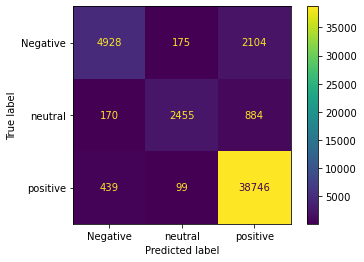

In [35]:
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['Negative', 'neutral','positive'])

cm_display2.plot()
plt.show()

# TFIDF vectorizer model with MultinomialNB Classifier.

In [36]:
model3= MultinomialNB().fit(x_train_vector, y_train)
y_pred3 = model3.predict(x_test_vector)

In [37]:
compare3 = pd.DataFrame()
compare3['actual'] = y_test
compare3['predicted'] = y_pred3
compare3

,actual,predicted
109672,Positive,Positive
143738,Positive,Positive
180135,Negative,Positive
248710,Positive,Positive
41081,Positive,Positive
...,...,...
23704,Positive,Positive
228320,Positive,Positive
101091,Positive,Positive
174512,Positive,Positive


In [38]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    Negative       0.84      0.00      0.01      7207
     Neutral       0.50      0.01      0.02      3509
    Positive       0.79      1.00      0.88     39284

    accuracy                           0.79     50000
   macro avg       0.71      0.34      0.30     50000
weighted avg       0.77      0.79      0.69     50000



In [39]:
accuracy3 = accuracy_score(y_test,y_pred3)
recall3 = recall_score(y_test,y_pred3, average = 'weighted')
f1score3  = f1_score(y_test,y_pred3, average = 'weighted')
precision3= precision_score(y_test,y_pred3, average = 'weighted')


print('Accuracy  :', round(accuracy3,2))
print('Recall    :', round(recall3,2))
print('F1-score  :', round(f1score3,2))
print('Precision :', round(precision3,2))

Accuracy  : 0.79
Recall    : 0.79
F1-score  : 0.69
Precision : 0.77


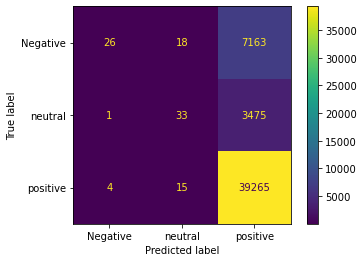

In [40]:
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = ['Negative', 'neutral','positive'])

cm_display3.plot()
plt.show()

# TFIDF vectorizer model with DecisionTreeClassifier .

In [41]:
from sklearn.tree import DecisionTreeClassifier
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(x_train_vector, y_train)    
    score = clf.score(x_test_vector, y_test)
    accuracy.append(score)
    
accuracy

[0.78568,
 0.78568,
 0.78568,
 0.78622,
 0.78612,
 0.78658,
 0.78944,
 0.79094,
 0.79512]

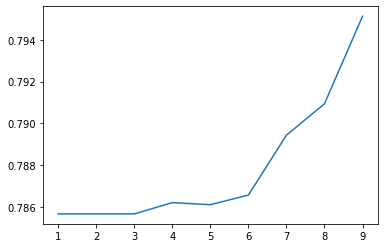

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(1,10), accuracy)
plt.show()

In [43]:
model_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
model_tree.fit(x_train_vector, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [44]:
y_pred_tree = model_tree.predict(x_test_vector)

In [45]:
compare4 = pd.DataFrame()
compare4['actual'] = y_test
compare4['predicted'] = y_pred_tree
compare4

,actual,predicted
109672,Positive,Positive
143738,Positive,Positive
180135,Negative,Positive
248710,Positive,Positive
41081,Positive,Positive
...,...,...
23704,Positive,Positive
228320,Positive,Positive
101091,Positive,Positive
174512,Positive,Positive


In [46]:
print(classification_report(y_test, y_pred_tree))

C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.56      0.02      0.05      7207
     Neutral       0.00      0.00      0.00      3509
    Positive       0.79      1.00      0.88     39284

    accuracy                           0.79     50000
   macro avg       0.45      0.34      0.31     50000
weighted avg       0.70      0.79      0.70     50000



C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
accuracy4= accuracy_score(y_test,y_pred_tree)
recall4 = recall_score(y_test,y_pred_tree, average = 'weighted')
f1score4  = f1_score(y_test,y_pred_tree, average = 'weighted')
precision4= precision_score(y_test,y_pred_tree, average = 'weighted')


print('Accuracy  :', round(accuracy4,2))
print('Recall    :', round(recall4,2))
print('F1-score  :', round(f1score4,2))
print('Precision :', round(precision4,2))

Accuracy  : 0.79
Recall    : 0.79
F1-score  : 0.7
Precision : 0.7


C:\Users\ankit gurung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


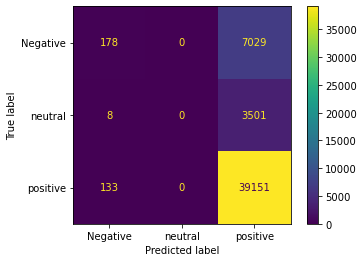

In [48]:
confusion_matrix4 = confusion_matrix(y_test, y_pred_tree)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = ['Negative', 'neutral','positive'])

cm_display4.plot()
plt.show()

# TFIDF vectorizer model with RandomForestClassifier .

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_jobs=-1)
clf1.fit(x_train_vector, y_train)
y_pred5 = clf1.predict(x_test_vector) 

In [50]:
compare5 = pd.DataFrame()
compare5['actual'] = y_test
compare5['predicted'] = y_pred5
compare5

,actual,predicted
109672,Positive,Positive
143738,Positive,Positive
180135,Negative,Positive
248710,Positive,Positive
41081,Positive,Positive
...,...,...
23704,Positive,Positive
228320,Positive,Positive
101091,Positive,Positive
174512,Positive,Positive


In [51]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

    Negative       0.96      0.16      0.28      7207
     Neutral       0.89      0.51      0.65      3509
    Positive       0.84      1.00      0.91     39284

    accuracy                           0.84     50000
   macro avg       0.90      0.56      0.61     50000
weighted avg       0.86      0.84      0.80     50000



In [52]:
accuracy5= accuracy_score(y_test,y_pred5)
recall5 = recall_score(y_test,y_pred5, average = 'weighted')
f1score5  = f1_score(y_test,y_pred5, average = 'weighted')
precision5= precision_score(y_test,y_pred5, average = 'weighted')


print('Accuracy  :', round(accuracy5,2))
print('Recall    :', round(recall5,2))
print('F1-score  :', round(f1score5,2))
print('Precision :', round(precision5,2))

Accuracy  : 0.84
Recall    : 0.84
F1-score  : 0.8
Precision : 0.86


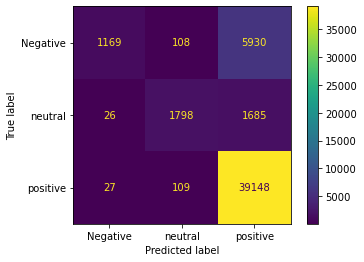

In [53]:
confusion_matrix5 = confusion_matrix(y_test, y_pred5)
cm_display5 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = ['Negative', 'neutral','positive'])

cm_display5.plot()
plt.show()

# Final Dataframe

In [55]:
final_data=pd.DataFrame({'Models':['Logistic Regression','OVR classifier','MultinomialNB','DecisionTreeClassifier','RandomForestClassifier'],
                        'F1-Score':[f1score1,f1score2,f1score3,f1score4,f1score5],
                         'Recall_score':[recall1,recall2,recall3,recall4,recall5],
                        'Precison_score':[precision1,precision2,precision3,precision4,precision5],
                        'Accuracy_score':[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]})

In [56]:
final_data

,Models,F1-Score,Recall_score,Precison_score,Accuracy_score
0,Logistic Regression,0.928436,0.93120,0.929177,0.93120
1,OVR classifier,0.918201,0.92258,0.920848,0.92258
2,MultinomialNB,0.694130,0.78648,0.774175,0.78648
3,DecisionTreeClassifier,0.698330,0.78658,0.699583,0.78658
4,RandomForestClassifier,0.800574,0.84230,0.858249,0.84230


CONCLUSION:- FROM THE ABOVE DATAFRAME WE CAN SEE THAT LOGISTIC REGRESSION HAS THE HIGHEST F1-SCORE AS COMPARE TO OTHERS MODEL.SO WE WILL CONSIDER LOGISTIC REGRESSION IS THE BEST MODEL FOR MODELLING.

# TESTING  WITH FINAL MODEL 

In [67]:
demo_review = np.array(['Poor quality. Faulty device.'])
demo_review_X_test = tfidf_vectorizer.transform(demo_review)
print(lr.predict(demo_review_X_test))

['Negative']


In [68]:
demo_review2 = np.array(['GOOD QUALITY. GREAT device.'])
demo_review_X_test2 = tfidf_vectorizer.transform(demo_review2)
print(lr.predict(demo_review_X_test2))

['Positive']


In [69]:
demo_review3 = np.array(['MONEY. SCHOOL EDUCATION.'])
demo_review_X_test3 = tfidf_vectorizer.transform(demo_review3)
print(lr.predict(demo_review_X_test3))

['Neutral']
